# **Setting Up the Environment** 🛠️

---



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append("..")  # Go up one level to access `src/`

In [4]:
from src.face_detector import FaceDetector

In [86]:
import os
from tqdm.notebook import tqdm

In [89]:
from sklearn.model_selection import train_test_split

In [94]:
import splitfolders

# 🎯 **Initialize FaceDetector** 🔍


* Checks if the model is loaded correctly before proceeding.

In [5]:
# # Load pre-trained face detection model
# prototxt_path = r"D:\ACC_Sprints_AI_ML_BootCamp\Capstone_projects\Capstone_4\face_recognition_project\models\opencv_face_detector\deploy.prototxt"
# model_path = r"D:\ACC_Sprints_AI_ML_BootCamp\Capstone_projects\Capstone_4\face_recognition_project\models\opencv_face_detector\res10_300x300_ssd_iter_140000.caffemodel"

# # Load the model
# net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)


# # Check if the model is loaded successfully
# if net.empty():
#     print("❌ Failed to load face detection model!")
# else:
#     print("✅ Face detection model loaded successfully!")


> Check our FaceDetector obj from our src

In [6]:
# Initialize FaceDetector with correct model paths
face_detector = FaceDetector(confidence_threshold=0.5)

# Check if the model is loaded successfully
if face_detector.net.empty():
    print("❌ Failed to load face detection model!")
else:
    print("✅ Face detection model loaded successfully!")

✅ Face detection model loaded successfully!


# 🎯 **Test it on an example image** 🔍


In [40]:
# Load an image
image_path = r"D:\ACC_Sprints_AI_ML_BootCamp\Capstone_projects\Capstone_4\face_recognition_project\data\raw\105_classes_pins_dataset\pins_Bill Gates\Bill Gates14_522.jpg"
image = cv2.imread(image_path)

> check image's shape

In [41]:
image.shape

(184, 163, 3)

> Function to simulate the preprocessing

In [42]:
def test_face_detection(image):
    """
    Tests face detection on an input image and displays the results.
    
    Args:
        image_path (str): Path to the image file.
    """

    # Detect faces
    cropped_faces, face_boxes = face_detector.detect_faces(image)

    # Display the original image with bounding boxes
    plt.figure(figsize=(6, 6))
    
    plt.axis("off")
    
    # Draw bounding boxes
    for (x1, y1, x2, y2) in face_boxes:
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    

    # Display cropped faces
    for idx, face in enumerate(cropped_faces):
        plt.figure(figsize=(2, 2))
        plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title(f"Face {idx+1}")
        # print(face.shape)
        plt.show()

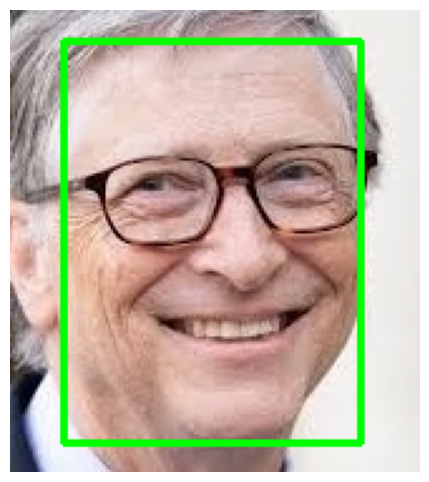

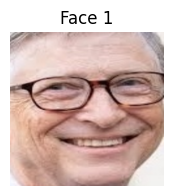

In [43]:
test_face_detection(image)

> lets concat 2 images and try again !!!

In [68]:
# load images :
image_1 = cv2.imread(r"D:\ACC_Sprints_AI_ML_BootCamp\Capstone_projects\Capstone_4\face_recognition_project\data\raw\105_classes_pins_dataset\pins_Bill Gates\Bill Gates6_596.jpg")
image_2 = cv2.imread(r"D:\ACC_Sprints_AI_ML_BootCamp\Capstone_projects\Capstone_4\face_recognition_project\data\raw\105_classes_pins_dataset\pins_Johnny Depp\Johnny Depp26_1881.jpg")
image_3 = cv2.imread(r"D:\ACC_Sprints_AI_ML_BootCamp\Capstone_projects\Capstone_4\face_recognition_project\data\raw\105_classes_pins_dataset\pins_Jimmy Fallon\Jimmy Fallon56_2848.jpg")

> lets show them first :

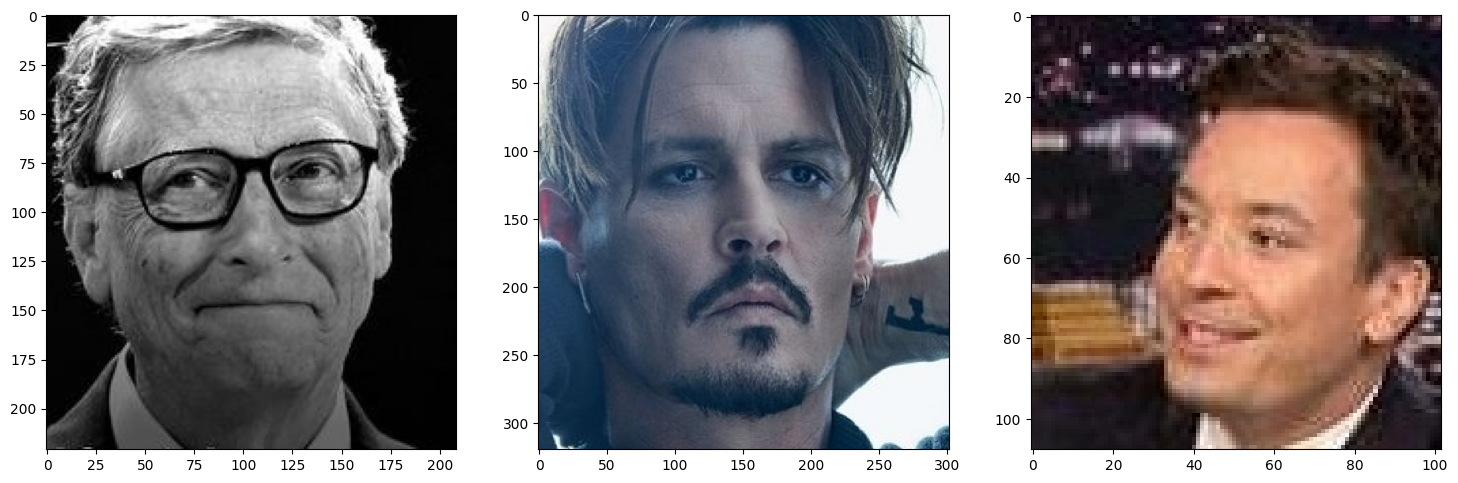

In [69]:
plt.subplots(1, 3, figsize=(18, 6))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(image_3, cv2.COLOR_BGR2RGB))

> cancat them "horizontally"

In [75]:
# Concatenate images 
concatenated_image = cv2.hconcat([cv2.resize(image_1, (300,300)), cv2.resize(image_2, (300,300)),cv2.resize(image_3, (300,300))])

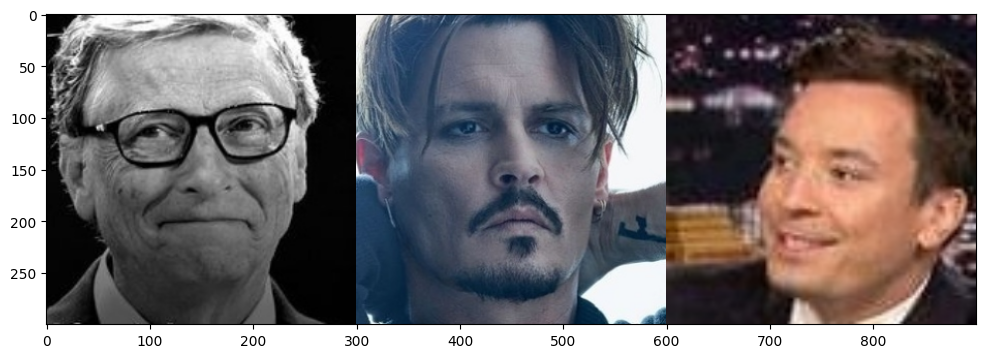

In [78]:
# visualization :
plt.figure(figsize=(12,6))
plt.imshow(cv2.cvtColor(concatenated_image, cv2.COLOR_BGR2RGB))

> now lets try to pass the conc, photo to model and check it can detect multiple photos and our confidence works well

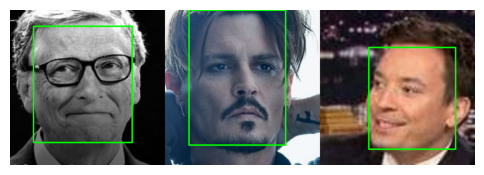

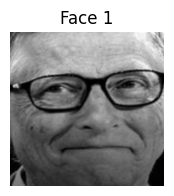

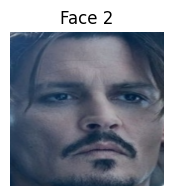

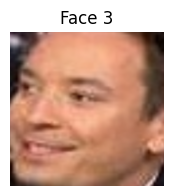

In [80]:
test_face_detection(concatenated_image)

## All is good we are ready to do our preprocessing .....?

# 🎯 **Face Detection & Saving** 🔍

---



In [81]:
# Paths
RAW_DATA_DIR = r"..\data\raw\105_classes_pins_dataset"
PROCESSED_DIR = r"..\data\processed\faces"

In [87]:
def process_dataset(raw_data_dir, processed_dir):
    """
    Process all images in the dataset, detect faces, and save them.
    """

    if not os.path.exists(processed_dir):
        os.makedirs(processed_dir)

    # Loop through each person's folder
    for person_name in tqdm(os.listdir(raw_data_dir), desc="Processing Persons"):
        person_folder = os.path.join(raw_data_dir, person_name)
        save_folder = os.path.join(processed_dir, person_name)

        if not os.path.isdir(person_folder):  # Skip if not a folder
            continue

        os.makedirs(save_folder, exist_ok=True)

        print(f"\n 📂 Processing folder: {person_name}...")  

        # Process each image in the person's folder
        for img_name in os.listdir(person_folder):
            # Only process .jpg and .png files
            if not (img_name.endswith(".jpg") or img_name.endswith(".png")):
                continue  


            img_path = os.path.join(person_folder, img_name)

            try:
                image = cv2.imread(img_path)
                if image is None:
                    continue  # Skip 

                # Detect faces
                cropped_faces, _ = face_detector.detect_faces(image)

                # Save each detected face
                for idx, face in enumerate(cropped_faces):
                    # Resize the face to (299, 299)
                    face_resized = cv2.resize(face, (299, 299))
                    save_path = os.path.join(save_folder, f"{img_name}_face{idx}.jpg")

                    cv2.imwrite(save_path, face_resized)

            except Exception as e:
                print(f"❌ Error processing {img_name}: {e}")

    print("\n✅ Dataset processing complete!")

In [88]:
process_dataset(RAW_DATA_DIR,PROCESSED_DIR)

Processing Persons:   0%|          | 0/105 [00:00<?, ?it/s]


 📂 Processing folder: pins_Adriana Lima...

 📂 Processing folder: pins_Alex Lawther...

 📂 Processing folder: pins_Alexandra Daddario...

 📂 Processing folder: pins_Alvaro Morte...

 📂 Processing folder: pins_alycia dabnem carey...

 📂 Processing folder: pins_Amanda Crew...

 📂 Processing folder: pins_amber heard...

 📂 Processing folder: pins_Andy Samberg...

 📂 Processing folder: pins_Anne Hathaway...

 📂 Processing folder: pins_Anthony Mackie...

 📂 Processing folder: pins_Avril Lavigne...

 📂 Processing folder: pins_barack obama...

 📂 Processing folder: pins_barbara palvin...

 📂 Processing folder: pins_Ben Affleck...

 📂 Processing folder: pins_Bill Gates...

 📂 Processing folder: pins_Bobby Morley...

 📂 Processing folder: pins_Brenton Thwaites...

 📂 Processing folder: pins_Brian J. Smith...

 📂 Processing folder: pins_Brie Larson...

 📂 Processing folder: pins_camila mendes...

 📂 Processing folder: pins_Chris Evans...

 📂 Processing folder: pins_Chris Hemsworth...

 📂 Proces

# 🎯 **Split Using splitfolders** 🔍

---



In [97]:
# Paths
INPUT_FOLDER = r"..\data\processed\faces"
OUTPUT_FOLDER = r"..\data\processed\split_faces"

In [99]:
# Split with 80% train, 10% val, 10% test
splitfolders.ratio(INPUT_FOLDER, output=OUTPUT_FOLDER, seed=42, ratio=(0.8, 0.1, 0.1), move=False)

Copying files: 2855 files [15:56,  2.99 files/s]
Copying files: 3953 files [14:11,  4.64 files/s]


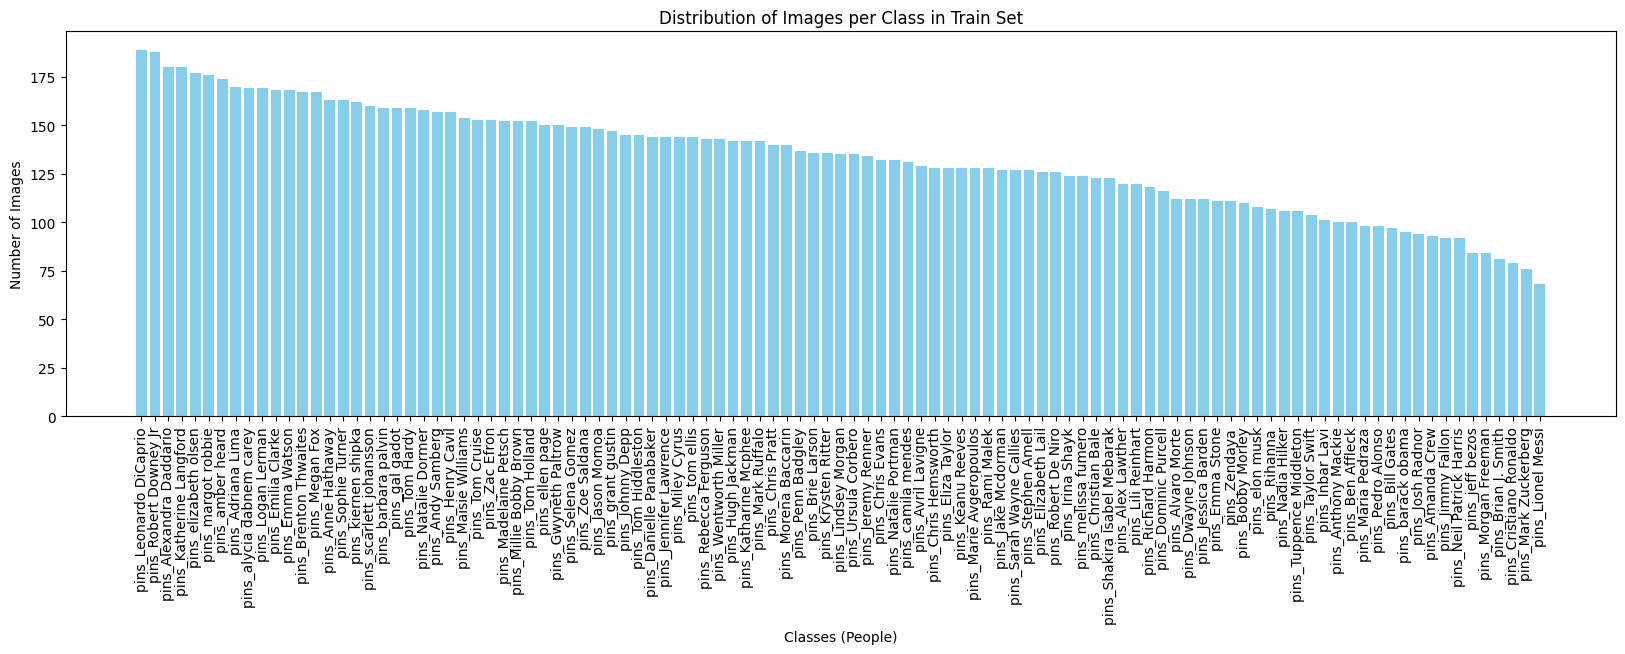

In [104]:
# Path to the train folder
TRAIN_DIR =  r"..\data\processed\split_faces\train" 

# Count images per class
class_counts = {cls: len(os.listdir(os.path.join(TRAIN_DIR, cls))) for cls in os.listdir(TRAIN_DIR)}

# Sort classes by count (optional)
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

# Plot the distribution
plt.figure(figsize=(20, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Classes (People)")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class in Train Set")
plt.show()

In [109]:
def plot_class_distribution(base_dir, dataset_names=["train", "val", "test"]):
    """
    Plots the distribution of images per class for train, validation, and test sets.

    """
    for dataset in dataset_names:
        dataset_path = os.path.join(base_dir, dataset)

        if not os.path.exists(dataset_path):
            print(f"Skipping {dataset} - Directory not found.")
            continue  # Skip if folder does not exist

        # Count images per class
        class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in os.listdir(dataset_path)}

        # Sort by count (optional)
        class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

        # Plot distribution
        plt.figure(figsize=(20, 5))
        plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
        plt.xticks(rotation=90)
        plt.xlabel("Classes (People)")
        plt.ylabel("Number of Images")
        plt.title(f"Distribution of Images per Class in {dataset.capitalize()} Set")
        plt.show()

In [110]:
# Base directory where split datasets are stored
SPLIT_DIR = r"..\data\processed\split_faces"

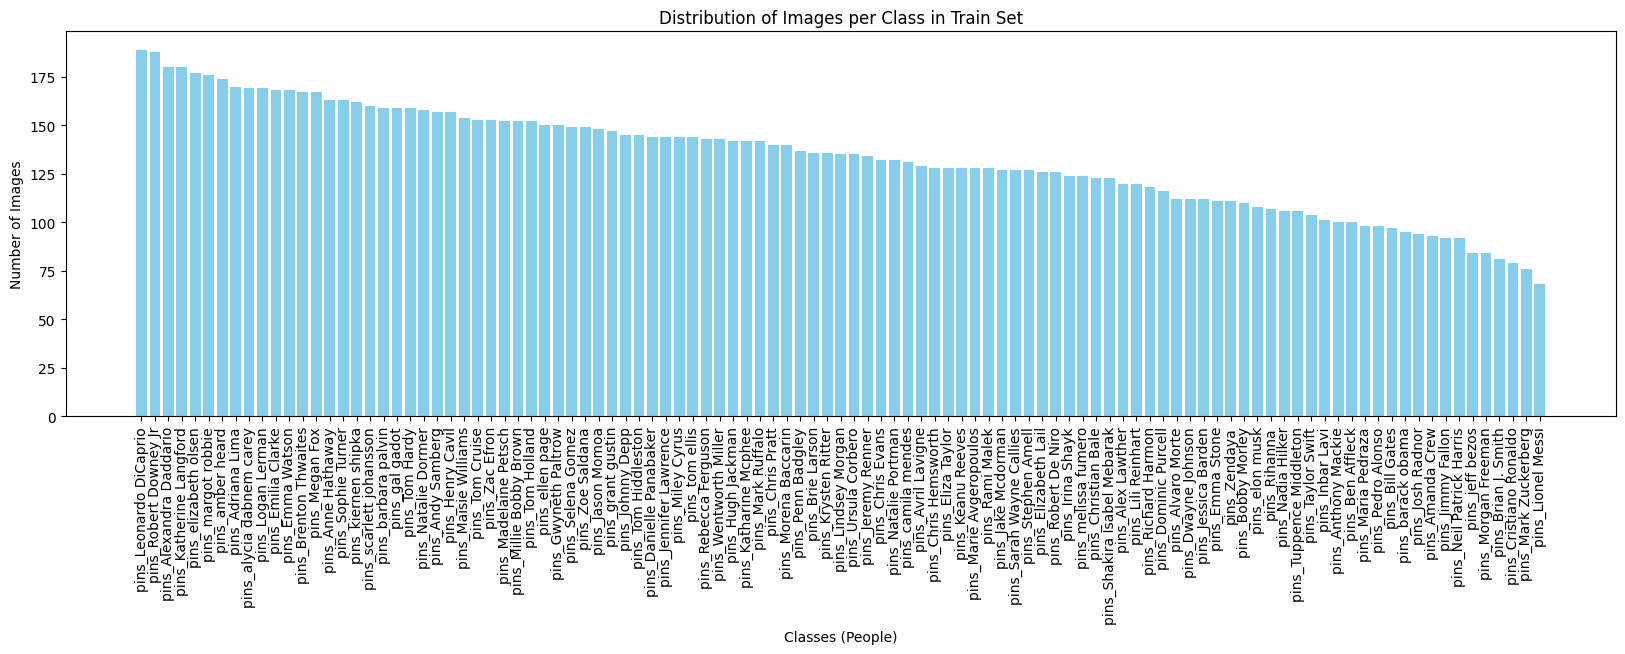

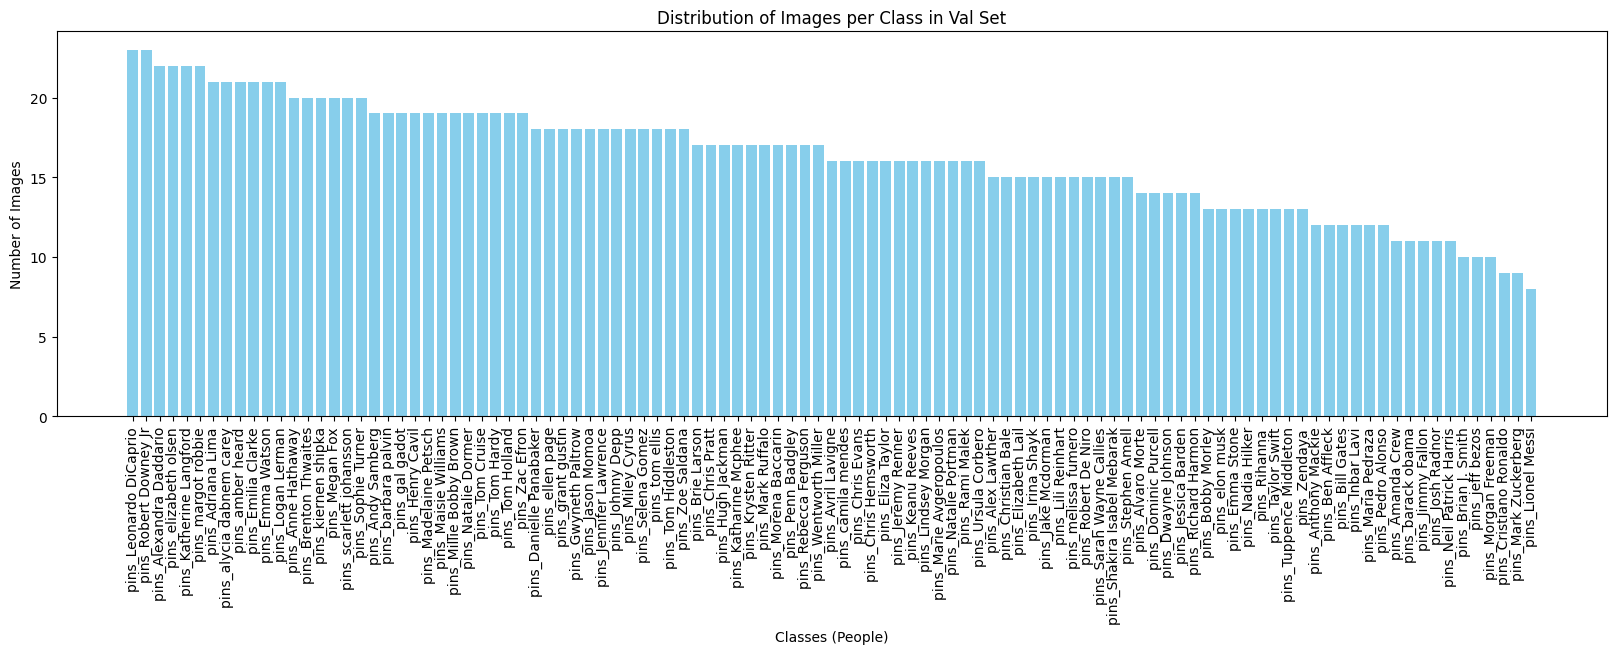

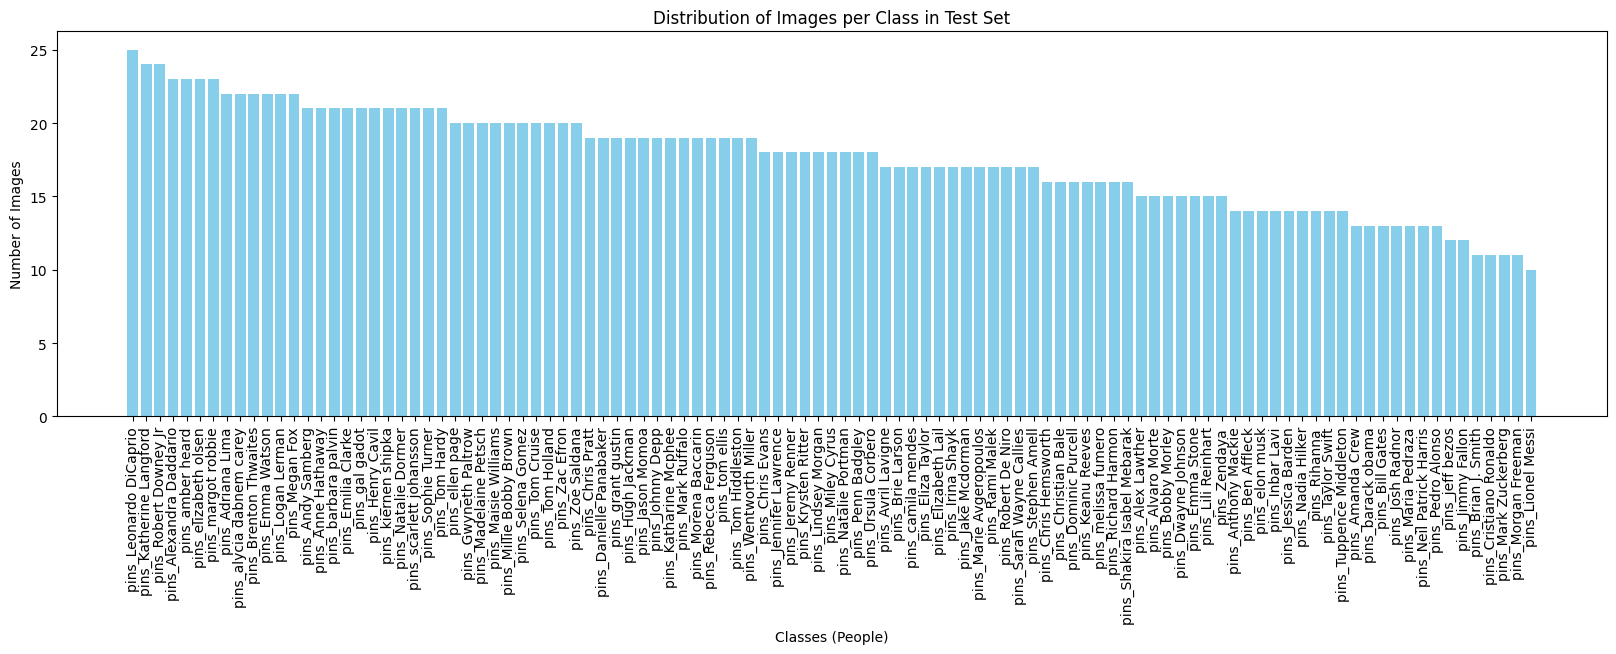

In [111]:
# Run the function
plot_class_distribution(SPLIT_DIR)

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
     🔍   

</h1>

    * almost same distribution as the split done individually ....
    * we can solve the problem of unbalanced dataset by using  Data Augmentation ....

---

## manual way

In [ ]:
# def split_dataset(processed_dir, output_dir, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
#     """
#     Splits the dataset into train, validation, and test sets while keeping a balanced distribution.
#     """
#     assert train_ratio + val_ratio + test_ratio == 1, "Ratios must sum to 1"

#     # Create output directories
#     for split in ["train", "val", "test"]:
#         os.makedirs(os.path.join(output_dir, split), exist_ok=True)

#     # Process each class (person)
#     for person in os.listdir(processed_dir):
#         person_path = os.path.join(processed_dir, person)
#         images = np.array(os.listdir(person_path))  # Convert to array for indexing

#         if len(images) < 3:  # Ensure at least 3 images exist per class
#             print(f" Skipping {person}, not enough images.")
#             continue

#         # Stratified splitting
#         train_imgs, temp_imgs = train_test_split(images, test_size=(1 - train_ratio), random_state=42)
#         val_imgs, test_imgs = train_test_split(temp_imgs, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)

#         # Copy files
#         for split, split_imgs in zip(["train", "val", "test"], [train_imgs, val_imgs, test_imgs]):
#             save_folder = os.path.join(output_dir, split, person)
#             os.makedirs(save_folder, exist_ok=True)

#             for img in split_imgs:
#                 shutil.copy(os.path.join(person_path, img), os.path.join(save_folder, img))

#     print("✅ True Stratified Split Completed! Data stored in:", output_dir)